In [1]:
# visualização de dados com html
# comparando genomas
import matplotlib.pyplot as plt
from collections import Counter


class Especie():

    def __init__(self, especie):
        self.__especie = especie
        self.__rna = self.__interpreta_rna()

    def __str__(self):
        return f'RNA: >>humano<<\n{self.__rna}\n'

    def __interpreta_rna(self):
        entrada = open(f'{self.__especie}.fasta').read()    # lê o arquivo .fasta, na mesma pasta
        entrada = entrada.replace('\n','')                  # remove o caractere de pular linha
        contador = {}
        for i in ['A', 'T', 'C', 'G']:
            for j in ['A', 'T', 'C', 'G']:
                contador[i+j] = 0   # cria um dicionário com as 16 combinações possíveis como chaves, todas com valores 0
        for k in range(len(entrada)-1):
            contador[entrada[k]+entrada[k+1]] += 1
        return contador

    def analisa_genoma(self):
        print(f'Sequência de RNA analisada >>{self.__especie}<<\nOs 10 pares de nucleotídios que mais ocorrem são:')
        rna = Counter(self.__rna)
        total_genes = sum(rna.values())
        proporcoes = Counter(dict([(i, j / total_genes) for i, j in self.__rna.items()]))   # criando um Counter a partir de um dict a partir de uma lista 
        mais_comuns = proporcoes.most_common(10)
        for caractere, proporcao in mais_comuns:
            print(f' _ {caractere} => {proporcao * 100:05.2f}%')
        print('\n')

    def cria_grafico_html(self):
        saida = open(f'{self.__especie}.html', 'w')
        i = 1
        for k in self.__rna:
            transparencia = str(self.__rna[k] / max(self.__rna.values()))
            saida.write(f'<div style="width:100px; border:1px solid #111; color:#fff; height:100px; float:left; background-color:rgba(0, 0, 0, {transparencia})">{k}</div>')
            if i%4 == 0:
                saida.write('<div style="clear:both"></div>')
            i+=1
        saida.close()
        print(f'Arquivo gráfico "{self.__especie}.html" criado com sucesso!')

    def compara_genoma(self, other):
        plt.figure(figsize = (12, 6))
        plt.title('Pares de nucleotídeos')
        plt.xlabel('Pares')
        plt.ylabel('Quantidades')
        plt.bar(self.__rna.keys(), self.__rna.values(), label=f'{self.__especie}', width=-0.35, align='edge', color='darkorange', edgecolor='k')
        plt.bar(other.__rna.keys(), other.__rna.values(), label=f'{other.__especie}', width=0.35, align='edge', color='lightgreen', edgecolor='k')
        plt.legend()
        plt.show()

humano      = Especie('humano')
bacteria    = Especie('bacteria')

In [2]:
print(humano)
humano.analisa_genoma()
humano.cria_grafico_html()

RNA: >>humano<<
{'AA': 116, 'AT': 95, 'AC': 97, 'AG': 113, 'TA': 85, 'TT': 113, 'TC': 109, 'TG': 111, 'CA': 87, 'CT': 105, 'CC': 184, 'CG': 170, 'GA': 134, 'GT': 105, 'GC': 155, 'GG': 184}

Sequência de RNA analisada >>humano<<
Os 10 pares de nucleotídios que mais ocorrem são:
 _ CC => 09.37%
 _ GG => 09.37%
 _ CG => 08.66%
 _ GC => 07.90%
 _ GA => 06.83%
 _ AA => 05.91%
 _ AG => 05.76%
 _ TT => 05.76%
 _ TG => 05.65%
 _ TC => 05.55%


Arquivo gráfico "humano.html" criado com sucesso!


In [3]:
print(bacteria)
bacteria.analisa_genoma()
bacteria.cria_grafico_html()

RNA: >>humano<<
{'AA': 105, 'AT': 64, 'AC': 86, 'AG': 111, 'TA': 64, 'TT': 57, 'TC': 60, 'TG': 108, 'CA': 83, 'CT': 75, 'CC': 74, 'CG': 97, 'GA': 113, 'GT': 93, 'GC': 109, 'GG': 147}

Sequência de RNA analisada >>bacteria<<
Os 10 pares de nucleotídios que mais ocorrem são:
 _ GG => 10.17%
 _ GA => 07.81%
 _ AG => 07.68%
 _ GC => 07.54%
 _ TG => 07.47%
 _ AA => 07.26%
 _ CG => 06.71%
 _ GT => 06.43%
 _ AC => 05.95%
 _ CA => 05.74%


Arquivo gráfico "bacteria.html" criado com sucesso!


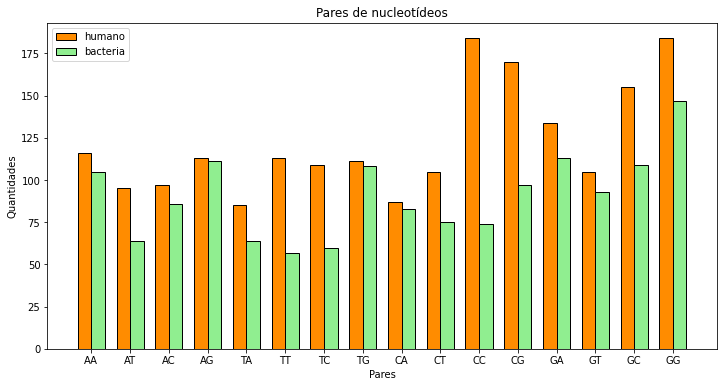

In [4]:
humano.compara_genoma(bacteria)